# Jets.jl
The Jets.jl package is a Chevron linear and nonlinear operator framework that is useful for building operators used in inverse problems, such as FWI. 

Jets operators are organized into operator packs:
* `JetPack.jl` padding and truncation, derivatives and integration, permutations and reshaping, and more esoteric operators including transcendental functions  
* `JetPackDSP.jl` digital signal processing including convolution, filtering, and envelopes of signals
* `JetPackTransforms.jl` slant stack, wavelet, cosine, and Fourier transforms of signals
* `JetPackWaveFD.jl`  seismic modeling operators and Jacobians for use in full waveform inversion 

## Add packages used in this group of notebooks to your environment

In [1]:
using Jets, JetPack, JetPackTransforms, PyPlot, Random, JetPackDSP, LinearAlgebra

# JetSpace

JetSpace is an n-dimensional vector space with additional meta-data.  The additional data is:
* a size (n1,n2,...,np) where prod(n1,n2,...np) = n
* a element type such as Float32, Float64, ComplexF64, etc.

### Example 1: 10 dimensions, single precision:

In [2]:
R₁ = JetSpace(Float32,10)

JetSpace{Float32,1}((10,))

### Example 2: 200 dimensions, double precision, 10x20 array size

In [3]:
R₂ = JetSpace(Float64,10,20)

JetSpace{Float64,2}((10, 20))

### Example 3: 400 dimensions, double precision complex, 10x20x2 array size

In [4]:
R₃ = JetSpace(ComplexF64,10,20,2)

JetSpace{Complex{Float64},3}((10, 20, 2))

### Convenience methods
Given a space, we can use various convenience methods to inspect and use the space.

In [5]:
eltype(R₂)

Float64

In [6]:
ndims(R₂)

2

In [7]:
length(R₂)

200

In [8]:
size(R₂)

(10, 20)

In [9]:
reshape(ones(200), R₂)

10×20 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [10]:
ones(R₂)

10×20 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [11]:
zeros(R₂)

10×20 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [12]:
rand(R₂)

10×20 Array{Float64,2}:
 0.0886562  0.358071  0.496942   …  0.0116482   0.915527   0.772992
 0.0172601  0.269985  0.186518      0.134234    0.924338   0.0652378
 0.55527    0.882708  0.556064      0.00500313  0.549915   0.265286
 0.0441227  0.137385  0.655203      0.677555    0.0450126  0.659201
 0.41626    0.600819  0.663184      0.247353    0.24793    0.441284
 0.412157   0.387547  0.359646   …  0.0326728   0.168353   0.32341
 0.260469   0.520764  0.089421      0.721207    0.129516   0.611746
 0.873918   0.959408  0.484825      0.683767    0.415674   0.0896736
 0.803005   0.551427  0.512047      0.752355    0.750637   0.0197654
 0.859921   0.13708   0.0700897     0.361819    0.253133   0.599527

In [13]:
Array(R₂)
# note the values in this returned array are undefined

10×20 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

# Jet operators

A Jet operator is a linear or nonlinear mapping between two spaces. In the case of a nonlinear operator, a jet also defines the linearization or Jacobian of the nonlinear mapping.

* A Jet operator encapsulates a Jet
* A Jet is loosely based on the mathematical name-sake, and includes the mapping and linearization

### See also
https://en.wikipedia.org/wiki/Jet_(mathematics)

### Example 1: Linear operator

In [14]:
A = JopDiagonal(rand(2))

"Jet linear operator, (2,) → (2,)"

In [15]:
state(A)

(diagonal = [0.30305942757302473, 0.7577301147615294],)

In [16]:
B = convert(Array,A)

2×2 Array{Float64,2}:
 0.303059  0.0
 0.0       0.75773

In [17]:
# create a random vector in the domain of operator A
m = rand(domain(A))

2-element Array{Float64,1}:
 0.1734545126737037
 0.16709953594029314

In [18]:
# apply the forward lineare map of operator A to domain vector m, returning range vector d
d = A*m

2-element Array{Float64,1}:
 0.052567025320850606
 0.12661635054463663

In [19]:
# inplace version that stores A*m in the supplied range vector d
mul!(d,A,m)

2-element Array{Float64,1}:
 0.052567025320850606
 0.12661635054463663

In [20]:
# apply the adjoint lineare map of operator A to range vector d, returning domain vector a
a = A'*d

2-element Array{Float64,1}:
 0.015930932602953682
 0.09594102182887355

In [21]:
# inplace version that stores A'*d in the supplied domain vector a
mul!(a,A',d)

2-element Array{Float64,1}:
 0.015930932602953682
 0.09594102182887355

### Example 2: Nonlinear operator

In [22]:
F = JopEnvelope(JetSpace(Float64,64))

"Jet nonlinear operator, (64,) → (64,)"

In [23]:
# a random domain vector with values in [-1,+1]
m = -1 .+ 2*rand(domain(F))

64-element Array{Float64,1}:
  0.7873410404866608
 -0.5233121035144728
  0.42728671747038627
 -0.002892130089680478
 -0.2398757138090306
  0.23363758854948635
 -0.8632383410363862
  0.8094999702558137
  0.7373721196009533
 -0.08437230997083756
  0.23061787544871004
 -0.2011114691746525
 -0.9073854820019345
  ⋮
  0.8311901231230863
  0.833835858592054
 -0.7647799131876134
 -0.8052944488782336
 -0.23982741422449383
  0.1722639369637311
  0.3952990191503347
 -0.29973959381730486
 -0.5928810620538112
 -0.43872461488334036
 -0.9079020953749457
 -0.5537077173372533

In [24]:
# Apply the nonlinear envelope operator to the domain vector m and return the result in the range vector d
d = F*m

64-element Array{Float64,1}:
 0.8152792466309035
 0.5500801380446221
 0.7771424010655119
 0.6140706657193801
 0.5860998905031608
 0.46506913558398316
 0.9998398568457513
 1.248797504750526
 0.8861613544244218
 0.32971901290216943
 0.24088562199134494
 0.7553378746598928
 1.0321226878354806
 ⋮
 0.8420060215910247
 1.6888733313347455
 1.437383866992587
 0.8129517027285474
 0.31714407963954655
 0.2012550827231281
 0.6027408120301202
 0.8501500537445098
 0.6512171114226268
 0.478704937372717
 0.9125340046421397
 1.2353920811348877

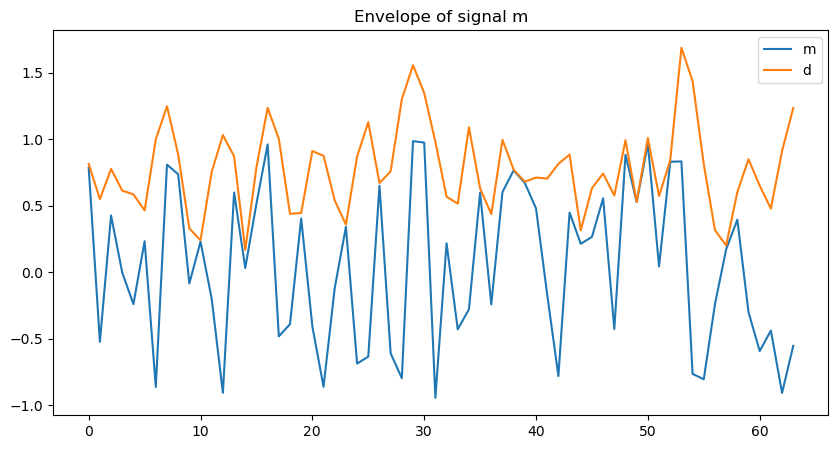

PyObject Text(0.5, 1.0, 'Envelope of signal m')

In [25]:
figure(figsize=(10,5))
plot(m, label="m")
plot(d, label="d")
legend()
title("Envelope of signal m")

In [26]:
# compute the jacobian of F, copying the underlying jet
J = jacobian(F, m) 

# compute the jacobian of F, sharing the underlying jet
J = jacobian!(F, m)

"Jet linear operator, (64,) → (64,)"

## Jet compositions

To compose operators, we use the symbol: $\circ$.  This can be typed using unicode which is fully supported in Julia.  In Jupyter (and most text editors with a Julia syntax plugin) you can use LaTeX syntax `\circ` to produce $\circ$.

In [27]:
A₁ = JopDiagonal(rand(2))
A₂ = JopDiagonal(rand(2))
A₃ = rand(2,2)

A = A₃ ∘ A₂ ∘ A₁

"Jet linear operator, (2,) → (2,)"

In [28]:
# test the composition behaves as expected
m = rand(domain(A))
A*m ≈ A₃ * (A₂ * (A₁ * m))

true

## Jet linear combinations
Compositions of linear operators do not require the `\circ` symbol

In [29]:
A = 2.0*A₁ - 3.0*A₂ + 4.0*A₃
A*m ≈ 2.0*(A₁*m) - 3.0*(A₂*m) + 4.0*(A₃*m)

true

## Jet nonlinear combinations
You may compose arbitrary combinations of linear and nonlinear operators, provided domains and ranges match up

In [30]:
A₁ = JopDiagonal(rand(Float64,10))
A₂ = JopDiagonal(rand(Float64,10))
E = JopEnvelope(JetSpace(Float64,10))

op = 2.0*A₁∘E∘A₂
m = rand(domain(op))
d = op*m

10-element Array{Float64,1}:
 0.5918197463999675
 0.6300353386716022
 0.7431101721172502
 0.573790745606475
 0.49761696970045355
 0.5837764051854917
 0.3825621497045931
 0.647420541021042
 0.8163532424142848
 0.3562883687113704

# Jet block operators
We use block operators extensively, particular in the context of full waveform inversion where each source is assigned to a block. 

In [31]:
A = @blockop [JopDiagonal(rand(2)) JopDiagonal(rand(2))]

"Jet linear operator, (4,) → (2,)"

In [32]:
m = rand(domain(A))

4-element Jets.BlockArray{Float64,Array{Float64,1}}:
 0.6639966547572143
 0.010908114476342323
 0.3448530800797167
 0.2882051298870547

In [33]:
d = A*m

2-element Jets.BlockArray{Float64,Array{Float64,1}}:
 0.3922648043710911
 0.09965694281292975

We use array comprehensions extensively in connection with the block operator

In [34]:
A = @blockop [JopDiagonal(rand(2)) for irow=1:2, icol=1:3]

"Jet linear operator, (6,) → (4,)"

In [35]:
nblocks(A)

(2, 3)

In [36]:
nblocks(A,1)

2

In [37]:
nblocks(A,2)

3

In [38]:
getblock(A,1,1)

"Jet linear operator, (2,) → (2,)"